# House Prices: Advanced Regression Techniques

## Missing values

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline


In [209]:
house_prices = pd.read_csv('../train.csv')

In [210]:
house_prices.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [211]:
missing = house_prices.isna().sum()
missing[missing > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [212]:
house_prices.loc[house_prices['BsmtFinSF1'] == 0 ,'BsmtFinType1'] = 'Unf'
house_prices.loc[house_prices['BsmtFinSF2'] == 0 ,'BsmtFinType2'] = 'Unf'

In [213]:
house_prices.loc[house_prices['GarageYrBlt'].isna(), 'GarageYrBlt'] = house_prices.loc[house_prices['GarageYrBlt'].isna(), 'YearBuilt']

In [214]:
# 1 missing value
house_prices.loc[house_prices['Electrical'].isna(), 'Electrical'] = 'SBrkr'

In [215]:
house_prices.loc[house_prices['MasVnrType'].isna(), 'MasVnrType'] = 'None'
house_prices.loc[house_prices['MasVnrArea'].isna(), 'MasVnrArea'] = 0

In [216]:
possible_lotFrontage_values = house_prices.groupby(['LotConfig', 'LotShape']).agg({'LotFrontage':'median'})
possible_lotFrontage_values = possible_lotFrontage_values.reset_index()
possible_lotFrontage_values

,LotConfig,LotShape,LotFrontage
0,Corner,IR1,96.0
1,Corner,IR2,96.0
2,Corner,IR3,247.5
3,Corner,Reg,75.0
4,CulDSac,IR1,50.0
5,CulDSac,IR2,49.0
6,CulDSac,IR3,168.0
7,CulDSac,Reg,NaN
8,FR2,IR1,77.0
9,FR2,IR2,48.0


In [218]:
missing_values = house_prices.loc[house_prices['LotFrontage'].isna(), ['LotConfig', 'LotShape']]
missing_values.shape

(259, 2)

In [219]:
merge_missing_with_domain = pd.merge(missing_values, possible_lotFrontage_values, how='left', left_on=['LotConfig', 'LotShape'], right_on=['LotConfig', 'LotShape'])
merge_missing_with_domain.shape

(259, 3)

In [220]:
house_prices.loc[house_prices['LotFrontage'].isna(), 'LotFrontage'] = merge_missing_with_domain['LotFrontage'].values

In [221]:
house_prices.loc[house_prices['LotFrontage'].isna(), 'LotFrontage']

660   NaN
Name: LotFrontage, dtype: float64

In [222]:
possible_lotFrontage_values = house_prices.groupby(['LotConfig']).agg({'LotFrontage':'median'})
possible_lotFrontage_values = possible_lotFrontage_values.reset_index()
possible_lotFrontage_values

,LotConfig,LotFrontage
0,Corner,89.0
1,CulDSac,50.0
2,FR2,65.0
3,FR3,59.5
4,Inside,68.0


In [224]:
missing_values = house_prices.loc[house_prices['LotFrontage'].isna(), ['LotConfig', 'LotShape']].copy()
missing_values.shape

(1, 2)

In [225]:
merge_missing_with_domain = pd.merge(missing_values, possible_lotFrontage_values, how='left', left_on=['LotConfig'], right_on=['LotConfig'])
merge_missing_with_domain

,LotConfig,LotShape,LotFrontage
0,CulDSac,Reg,50.0


In [185]:
house_prices.loc[house_prices['LotFrontage'].isna(), 'LotFrontage'] = merge_missing_with_domain['LotFrontage'].values

In [186]:
house_prices.loc[house_prices['LotFrontage'].isna(), 'LotFrontage']

Series([], Name: LotFrontage, dtype: float64)

In [193]:
missing = house_prices.isna().sum()
missing[missing > 0].index

Index(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'],
      dtype='object')

In [194]:
house_prices.drop(columns=['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType2',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PoolQC', 'Fence', 'MiscFeature'], inplace=True)

In [197]:
house_prices.to_csv('./train_wo_missing_values.csv')

In [ ]:
y = np.log(house_prices['SalePrice'])

In [9]:
x['BsmtQualBinary'] = (x['BsmtQual'] == 'Ex') | (x['BsmtQual'] == 'Gd')

In [10]:
x.drop(columns=['BsmtQual'], inplace=True)

In [11]:
x.drop(columns=['BsmtCond'], inplace=True)

In [12]:
x['BsmtExposureBinary'] = (x['BsmtExposure'] == 'Gd') | (x['BsmtExposure'] == 'Av') | (x['BsmtExposure'] == 'Mn')

In [13]:
x.drop(columns=['BsmtExposure'], inplace=True)

In [14]:
x['FireplaceQualBinary'] = (x['FireplaceQu'] == 'Ex') | (x['FireplaceQu'] == 'Gd') | (x['FireplaceQu'] == 'TA')

In [15]:
x.drop(columns=['FireplaceQu'], inplace=True)

In [16]:
x['GarageTypeBinary'] = (x['GarageType'] == 'Attchd') | (x['GarageType'] == 'BuiltIn')

In [17]:
x.drop(columns=['GarageType'], inplace=True)

In [19]:
x['GarageFinishBinary'] = (x['GarageFinish'] == 'Fin') | (x['GarageFinish'] == 'RFn')

In [20]:
x.drop(columns=['GarageFinish'], inplace=True)

In [21]:
x.drop(columns=['GarageQual'], inplace=True)

In [22]:
x.drop(columns=['GarageCond'], inplace=True)

In [23]:
x.drop(columns=['Fence'], inplace=True)

In [25]:
x['ElectricalSBrkr'] = x['Electrical'] == 'SBrkr'
x.drop(columns=['Electrical'], inplace=True)

In [27]:
x['MasVnrTypeBinary'] = (x['MasVnrType'] == 'BrkFace') | (x['MasVnrType'] == 'Stone')

In [28]:
x.drop(columns=['MasVnrType'], inplace=True)

In [29]:
##SP code
x['PavedDriveBinary'] = x['PavedDrive'] == 'Y'
x['SaleConditionBinary1'] = x['SaleCondition'] == 'Partial' #  Partial 1; everything else 0
x['SaleConditionBinary2'] = (x['SaleCondition'] == 'Abnorml') | (x['SaleCondition'] == 'AdjLand')#  Abnormal & Adjoin Land 1; everything else 0

##SP code
x.drop(columns=['PavedDrive'], inplace=True)
x.drop(columns=['SaleCondition'], inplace=True)

In [30]:
x['SaleTypeBinary1'] = x['SaleType'] == 'New'
x['SaleTypeBinary2'] = (x['SaleType'] == 'Oth') | (x['SaleType'] == 'ConLD') | (x['SaleType'] == 'COD')
x.drop(columns=['SaleType'], inplace=True)

In [31]:
x['KitchenQualBinary1'] = (x['KitchenQual'] == 'Ex') | (x['KitchenQual'] == 'Gd')
x.drop(columns=['KitchenQual'], inplace=True)

In [32]:
x['FoundationBinary'] = x['Foundation'] == 'PConc'
x.drop(columns=['Foundation'], inplace=True)

In [33]:
x['ExterCondBinary'] = (x['ExterCond'] == 'TA') | (x['ExterCond'] == 'Gd') | (x['ExterCond'] == 'Ex')
x.drop(columns=['ExterCond'], inplace=True)

In [34]:
x['ExterQualBinary'] = (x['ExterQual'] == 'Ex') | (x['ExterQual'] == 'Gd') 
x.drop(columns=['ExterQual'], inplace=True)

In [35]:
x['MSZoningBinary1'] = x['MSZoning'] == 'FV'
x['MSZoningBinary2'] = (x['MSZoning'] == 'C (all)') | (x['MSZoning'] == 'RH') | (x['MSZoning'] == 'RM')
x.drop(columns=['MSZoning'], inplace=True)

In [36]:
x['RoofStyleBinary'] = x['RoofStyle'] == 'Hip'
x.drop(columns=['RoofStyle'], inplace=True)

In [37]:
x['OverallQualBinary'] = x['OverallQual'].apply(lambda x: int(x) > 5)
x.drop(columns=['OverallQual'], inplace=True)

In [38]:
x['NeighborhoodPoor'] = (x['Neighborhood'] == 'BrDale') | (x['Neighborhood'] == 'BrkSide') | (x['Neighborhood'] == 'Edwards') |\
                        (x['Neighborhood'] == 'IDOTRR') | (x['Neighborhood'] == 'MeadowV') | (x['Neighborhood'] == 'Names') |\
                        (x['Neighborhood'] == 'OldTown')
x['NeighborhoodRich'] = (x['Neighborhood'] == 'Blmngtn') | (x['Neighborhood'] == 'CollgCr') | (x['Neighborhood'] == 'Gilbirt') |\
                        (x['Neighborhood'] == 'NoRidge') | (x['Neighborhood'] == 'NWAmes') | (x['Neighborhood'] == 'NridgHt') |\
                        (x['Neighborhood'] == 'Somerst') | (x['Neighborhood'] == 'StoneBr') | (x['Neighborhood'] == 'Timber') |\
                        (x['Neighborhood'] == 'Veenker')
x.drop(columns=['Neighborhood'], inplace=True)

In [39]:
x['MSSubClassBinary1'] = (x['MSSubClass'] == 30) | (x['MSSubClass'] == 45) | (x['MSSubClass'] == 50) |\
                         (x['MSSubClass'] == 90) | (x['MSSubClass'] == 180) | (x['MSSubClass'] == 190)
x['MSSubClassBinary2'] = (x['MSSubClass'] == 60) | (x['MSSubClass'] == 120)
x.drop(columns=['MSSubClass'], inplace=True)

In [40]:
x['OverallCondBinary'] = x['OverallCond'] > 4
x.drop(columns=['OverallCond'], inplace=True)

In [41]:
x['HouseStyleBinary1'] = (x['HouseStyle'] == '1.5Fin') | (x['HouseStyle'] == '1.5Unf')
x['HouseStyleBinary2'] = (x['HouseStyle'] == '2Story')
x.drop(columns=['HouseStyle'], inplace=True)

In [42]:
x['Exterior1stBinary1'] = (x['Exterior1st'] == 'AsbShng') | (x['Exterior1st'] == 'AsphShn') | (x['Exterior1st'] == 'BrkComm') |\
                          (x['Exterior1st'] == 'CBlock') | (x['Exterior1st'] == 'MetalSd') | (x['Exterior1st'] == 'Wd Sdng') |\
                          (x['Exterior1st'] == 'WdShing')
x['Exterior1stBinary2'] = (x['Exterior1st'] == 'ImStucc') | (x['Exterior1st'] == 'Stone') | (x['Exterior1st'] == 'VinylSd')
x.drop(columns=['Exterior1st'], inplace=True)

In [ ]:
x.drop(columns=['Alley', 'PoolQC', 'Utilities', 'MiscFeature', 'Id'], inplace=True)

In [43]:
x[x['LotArea'] < 1]

,LotFrontage,LotArea,Street,LotShape,LandContour,LotConfig,LandSlope,Condition1,Condition2,BldgType,...,OverallQualBinary,NeighborhoodPoor,NeighborhoodRich,MSSubClassBinary1,MSSubClassBinary2,OverallCondBinary,HouseStyleBinary1,HouseStyleBinary2,Exterior1stBinary1,Exterior1stBinary2


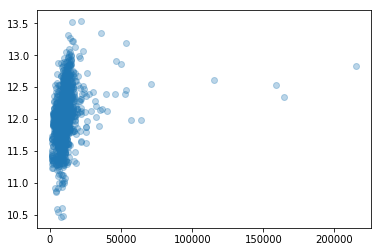

In [44]:
plt.scatter(x['LotArea'], y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


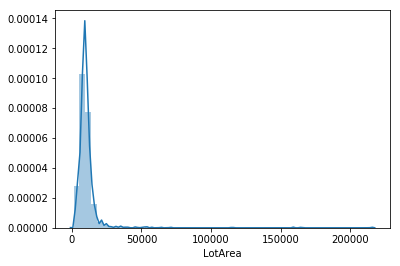

In [45]:
sns.distplot(x['LotArea'])

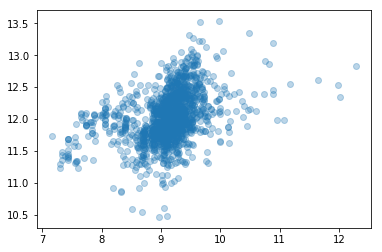

In [46]:
plt.scatter(np.log(x['LotArea']), y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


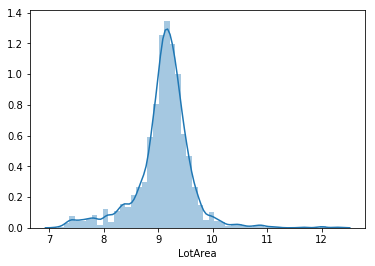

In [47]:
sns.distplot(np.log(x['LotArea']))

In [48]:
x['TotalFloor'] = x['1stFlrSF'] + x['2ndFlrSF']
print(x.loc[:,['1stFlrSF', '2ndFlrSF', 'TotalFloor', 'GrLivArea']].head())
np.corrcoef(x['TotalFloor'], x['GrLivArea'])

   1stFlrSF  2ndFlrSF  TotalFloor  GrLivArea
0       856       854        1710       1710
1      1262         0        1262       1262
2       920       866        1786       1786
3       961       756        1717       1717
4      1145      1053        2198       2198


array([[1.       , 0.9957176],
       [0.9957176, 1.       ]])

In [49]:
x['TotalBsmt'] = x['BsmtFinSF1'] + x['BsmtFinSF2'] + x['BsmtUnfSF']
print(x.loc[:,['TotalBsmt', 'TotalBsmtSF']].head())
np.corrcoef(x['TotalBsmt'], x['TotalBsmtSF'])

   TotalBsmt  TotalBsmtSF
0        856          856
1       1262         1262
2        920          920
3        756          756
4       1145         1145


array([[1., 1.],
       [1., 1.]])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


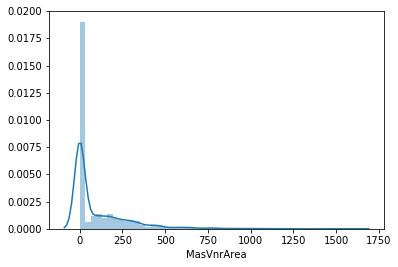

In [50]:
sns.distplot(x.loc[:, 'MasVnrArea'])

In [51]:
test, lam = stats.boxcox(x.loc[x['MasVnrArea']!=0, 'MasVnrArea'])
lam

0.264265606795351

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


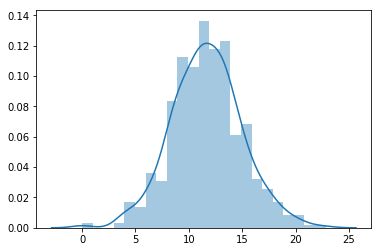

In [52]:
sns.distplot(test)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


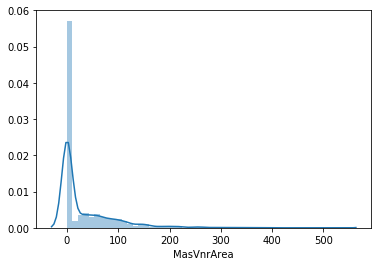

In [53]:
sns.distplot(x.loc[:, 'MasVnrArea']**1/3)

0.0012160540821508556 11.448881474750921


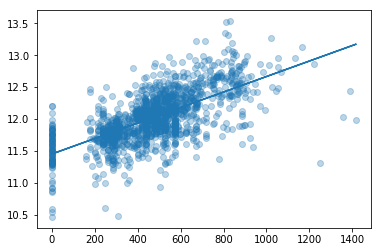

In [71]:
plt.scatter(x['GarageArea'], y, alpha=0.3)

from scipy import stats

# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x['GarageArea'],y)
print(slope, intercept)
y_fit = intercept + slope*x['GarageArea']
plt.plot(x['GarageArea'], y_fit)

(1379,)
(1379,)
0.0012527594729841724 11.427975486892215


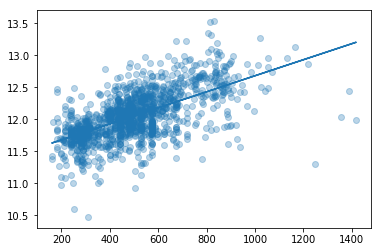

In [70]:
zero_garage = x['GarageArea'] != 0
test_x = x.loc[zero_garage, 'GarageArea']
test_y = y[zero_garage]

plt.scatter(test_x, test_y, alpha=0.3)

from scipy import stats

print(test_x.shape)
print(test_y.shape)
# Generated linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(test_x,test_y)
print(slope, intercept)
y_fit = intercept + slope*test_x
plt.plot(test_x, y_fit)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


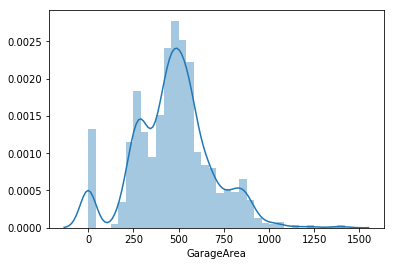

In [466]:
sns.distplot(x['GarageArea'])

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


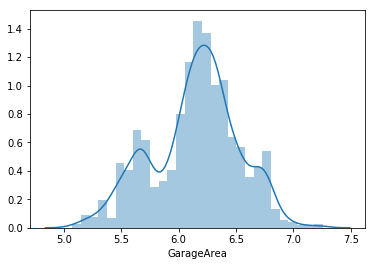

In [468]:
sns.distplot(np.log(x.loc[x['GarageArea'] != 0, 'GarageArea']))

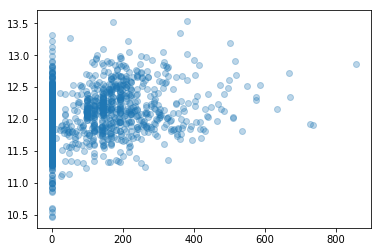

In [472]:
plt.scatter(x['WoodDeckSF'], y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


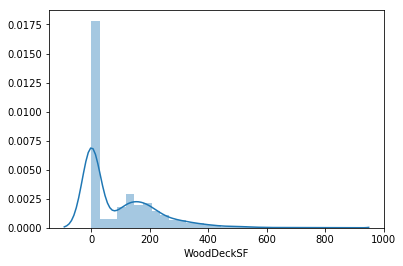

In [461]:
sns.distplot(x['WoodDeckSF'])

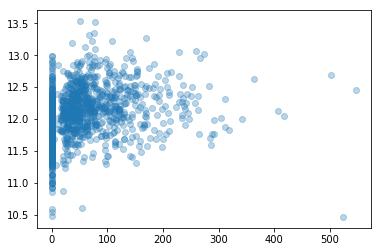

In [473]:
plt.scatter(x['OpenPorchSF'], y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


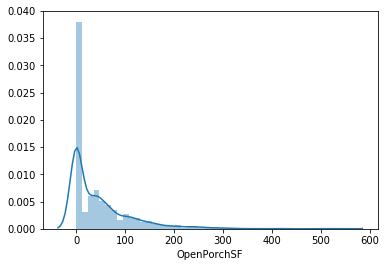

In [463]:
sns.distplot(x.loc[:, 'OpenPorchSF'])

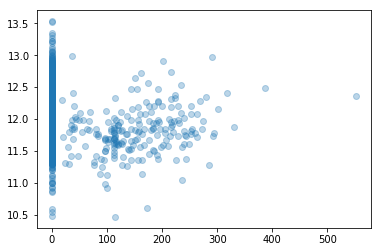

In [474]:
plt.scatter(x['EnclosedPorch'], y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


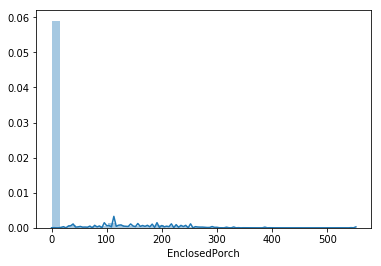

In [475]:
sns.distplot(x.loc[:, 'EnclosedPorch'])

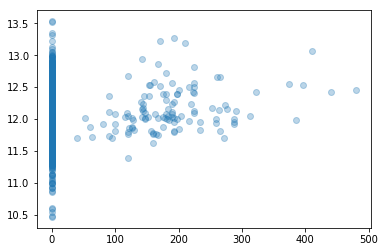

In [476]:
plt.scatter(x['ScreenPorch'], y, alpha=0.3)

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


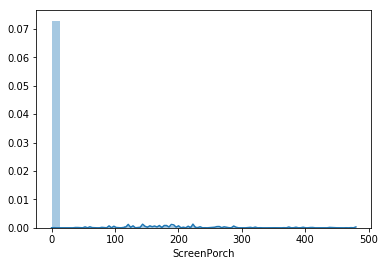

In [465]:
sns.distplot(x.loc[:, 'ScreenPorch'])

In [69]:
categorical_columns = ['MSSubClass','MSZoning','Street','LotShape','LandContour','LotConfig',
                         'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle',
                         'OverallQual','OverallCond','RoofStyle','RoofMatl','Exterior1st','Exterior2nd'
                         ,'ExterQual','ExterCond','Foundation'
                         ,'Heating','HeatingQC','CentralAir','KitchenQual',
                         'Functional','PavedDrive',
                         'SaleType','SaleCondition']
continuous_variables = x.loc[:, x.columns[~x.columns.isin(categorical_columns)]]
categorical_variables = x.loc[:,categorical_columns]

In [70]:
import pandas as pd
from scipy import stats

# Input a pandas series 
def ent(data):
    p_data= data.value_counts()/len(data) # calculates the probabilities
    entropy=stats.entropy(p_data)  # input probabilities to get the entropy 
    return entropy

for column in categorical_columns:
    print('{}: {}'.format(column, ent(house_prices[column])))

MSSubClass: 2.024945527593174
MSZoning: 0.6935649180202575
Street: 0.02668099163165204
LotShape: 0.7896365039389163
LandContour: 0.43913798248820113
LotConfig: 0.8482903143803834
LandSlope: 0.23254914335239535
Neighborhood: 2.9072649340716246
Condition1: 0.6219169442683833
Condition2: 0.07486720258699345
BldgType: 0.6535643223569176
HouseStyle: 1.2883880261007623
OverallQual: 1.723871291772616
OverallCond: 1.3349118855036286
RoofStyle: 0.6255102269356729
RoofMatl: 0.11646129913995895
Exterior1st: 1.8894895558636
Exterior2nd: 1.9506677965139474
ExterQual: 0.8257293822968184
ExterCond: 0.4379570714349328
Foundation: 1.0559633982404477
Heating: 0.1316611814478301
HeatingQC: 1.120185929337945
CentralAir: 0.24069167661877366
KitchenQual: 0.9923107993520877
Functional: 0.3514718671392047
PavedDrive: 0.33030942132852525
SaleType: 0.5424363866947558
SaleCondition: 0.6719048592709485


In [71]:
x.drop(columns=['Street', 'Condition2', 'Condition1', 'RoofMatl', 'Heating', 'LandSlope', 'LandContour', 'BldgType',\
                'Functional', 'Exterior2nd', 'MiscVal'], inplace=True)

In [229]:
def marca_base(Perc, x):
    if x >= Perc[(len(Perc)-1)]:
        return len(Perc) +1
    else:
        for i in range(len(Perc)):
            if x < Perc[i]:
                return i + 1

In [230]:
perc = list(np.percentile(y, [10, 20, 30, 40, 50, 60, 70, 80, 90]))
house_prices['SalePrice_percentil'] = [marca_base(perc, x) for x in y]

In [241]:
variable = 'Exterior1st'
agg_dict = {'YearBuilt' : 'count'}
heatmap = b.groupby([variable,'SalePrice_percentil']).agg(agg_dict).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot(variable,'SalePrice_percentil', 'YearBuilt').copy()
print('-------------------')
print('#NAs= '+str(b[variable].isnull().sum()))
print(variable)
print(sns.heatmap(heatmap, linewidths=.5, fmt='g',annot=True))

KeyError: 'SalePrice_percentil'

-------------------
#NAs= 0
Exterior1st
AxesSubplot(0.125,0.125;0.62x0.755)


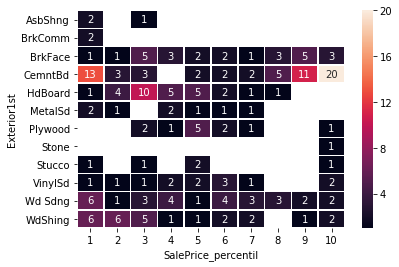

In [242]:
variable = 'Exterior1st'
agg_dict = {'YearBuilt' : 'count'}
heatmap = house_prices[house_prices['Exterior1st'] != house_prices['Exterior2nd']].groupby([variable,'SalePrice_percentil']).agg(agg_dict).copy()
heatmap.reset_index(inplace= True)
heatmap = heatmap.pivot(variable,'SalePrice_percentil', 'YearBuilt').copy()
print('-------------------')
print('#NAs= '+str(house_prices[house_prices['Exterior1st'] != house_prices['Exterior2nd']][variable].isnull().sum()))
print(variable)
print(sns.heatmap(heatmap, linewidths=.5, fmt='g',annot=True))

In [75]:
house_prices.loc[(house_prices['MasVnrType'].isna()), 'SalePrice_percentil'].value_counts()

8     4
7     2
10    1
9     1
Name: SalePrice_percentil, dtype: int64

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


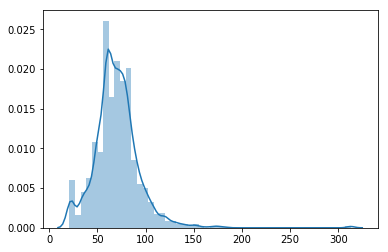

In [470]:
sns.distplot(sorted(house_prices.loc[~house_prices['LotFrontage'].isna(), 'LotFrontage']))

,LotConfig,LotShape,LotFrontage
0,Corner,IR1,96.0
1,Corner,IR2,96.0
2,Corner,IR3,247.5
3,Corner,Reg,75.0
4,CulDSac,IR1,50.0
5,CulDSac,IR2,49.0
6,CulDSac,IR3,168.0
7,CulDSac,Reg,NaN
8,FR2,IR1,77.0
9,FR2,IR2,48.0


In [475]:
x.loc[x['LotFrontage'].isna(), 'LotFrontage']

269     NaN
287     NaN
288     NaN
293     NaN
307     NaN
308     NaN
310     NaN
319     NaN
328     NaN
330     NaN
335     NaN
342     NaN
346     NaN
347     NaN
351     NaN
356     NaN
360     NaN
361     NaN
364     NaN
366     NaN
369     NaN
370     NaN
375     NaN
384     NaN
392     NaN
393     NaN
404     NaN
405     NaN
412     NaN
421     NaN
       ... 
1300    NaN
1301    NaN
1309    NaN
1312    NaN
1318    NaN
1321    NaN
1342    NaN
1346    NaN
1348    NaN
1354    NaN
1356    NaN
1357    NaN
1358    NaN
1362    NaN
1365    NaN
1368    NaN
1373    NaN
1381    NaN
1383    NaN
1396    NaN
1407    NaN
1417    NaN
1419    NaN
1423    NaN
1424    NaN
1429    NaN
1431    NaN
1441    NaN
1443    NaN
1446    NaN
Name: LotFrontage, Length: 212, dtype: object

In [476]:
t

,LotFrontage_x,LotConfig,LotShape,LotFrontage_y
0,NaN,Corner,IR1,96.0
1,NaN,Inside,IR2,71.0
2,NaN,Corner,IR1,96.0
3,NaN,CulDSac,IR1,50.0
4,NaN,Inside,IR1,71.0
5,NaN,CulDSac,IR1,50.0
6,NaN,CulDSac,IR1,50.0
7,NaN,CulDSac,IR1,50.0
8,NaN,Corner,IR2,96.0
9,NaN,Inside,Reg,65.0


In [317]:
a = x.isna().sum()
a[a > 0]

LotFrontage     212
BsmtFinType2      1
dtype: int64